In [1]:
import pandas as pd
import requests

# 1. python提取手写体
### 注意：不能识别中文

{'status': 'Succeeded', 'recognitionResults': [{'page': 1, 'clockwiseOrientation': 359.81, 'width': 311, 'height': 209, 'unit': 'pixel', 'lines': [{'boundingBox': [17, 0, 280, 1, 279, 14, 16, 11], 'text': 'low is everything going ? As you are interested in the', 'words': [{'boundingBox': [21, 0, 36, 0, 35, 9, 21, 8], 'text': 'low', 'confidence': 'Low'}, {'boundingBox': [43, 0, 53, 0, 52, 10, 43, 10], 'text': 'is', 'confidence': 'Low'}, {'boundingBox': [56, 0, 107, 0, 106, 12, 56, 10], 'text': 'everything'}, {'boundingBox': [111, 0, 137, 0, 136, 13, 110, 12], 'text': 'going'}, {'boundingBox': [140, 0, 146, 0, 145, 13, 140, 13], 'text': '?', 'confidence': 'Low'}, {'boundingBox': [147, 0, 161, 0, 160, 13, 147, 13], 'text': 'As', 'confidence': 'Low'}, {'boundingBox': [163, 0, 180, 1, 180, 13, 163, 13], 'text': 'you'}, {'boundingBox': [183, 1, 198, 1, 198, 13, 183, 13], 'text': 'are'}, {'boundingBox': [201, 1, 246, 1, 246, 13, 201, 13], 'text': 'interested'}, {'boundingBox': [250, 1, 259, 1

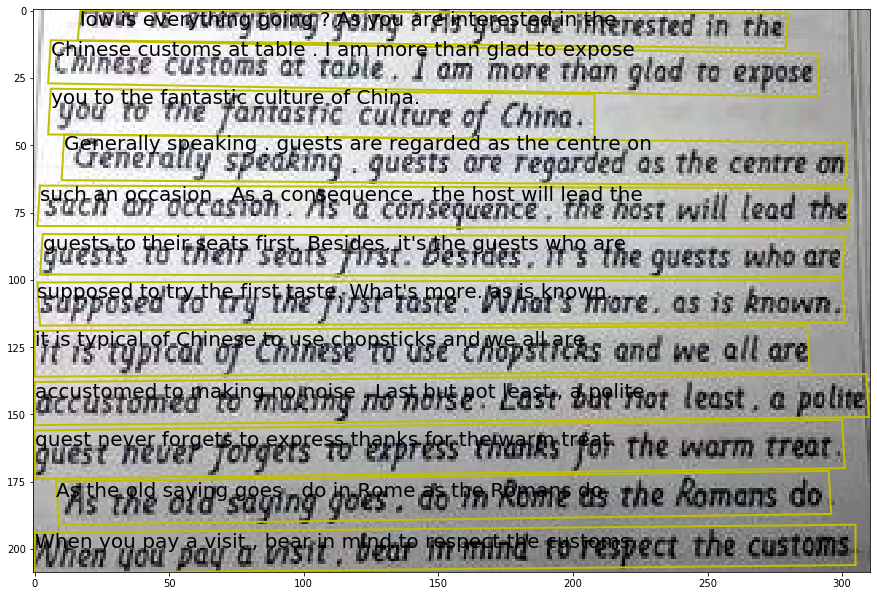

In [17]:
# 提取印刷体文本和手写体文本
import os
import sys
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

# Add your Computer Vision subscription key and endpoint to your environment variables.

subscription_key ="8631583d2bfc4ee886a5551eb79fd07f"
endpoint= "https://api-study-image.cognitiveservices.azure.com/"

text_recognition_url = endpoint + "vision/v2.1/read/core/asyncBatchAnalyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://ss1.bdstatic.com/70cFvXSh_Q1YnxGkpoWK1HF6hhy/it/u=137552344,2082739317&fm=26&gp=0.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, json=data)
response.raise_for_status()

# Extracting text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    print(analysis)
    time.sleep(1)
    if ("recognitionResults" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll = False

polygons = []
if ("recognitionResults" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["recognitionResults"][0]["lines"]]

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")

# 2. python提取印刷体

[{'boundingBox': '248,245,352,77', 'text': 'ANNE'}, {'boundingBox': '247,337,359,74', 'text': 'FRANK'}, {'boundingBox': '245,446,54,39', 'text': 'The'}, {'boundingBox': '313,447,76,47', 'text': 'Diary'}, {'boundingBox': '400,445,27,38', 'text': 'of'}, {'boundingBox': '437,463,13,20', 'text': 'a'}, {'boundingBox': '462,446,82,47', 'text': 'Young'}, {'boundingBox': '555,445,47,37', 'text': 'Girl'}, {'boundingBox': '247,518,40,19', 'text': 'With'}, {'boundingBox': '294,524,22,13', 'text': 'an'}, {'boundingBox': '324,517,102,19', 'text': 'introduction'}, {'boundingBox': '433,516,20,23', 'text': 'by'}, {'boundingBox': '459,516,63,18', 'text': 'Eleanor'}, {'boundingBox': '529,514,75,19', 'text': 'Roosevelt'}]


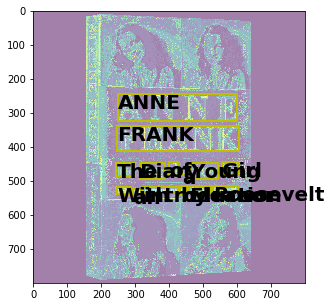

(0.0, 1.0, 0.0, 1.0)

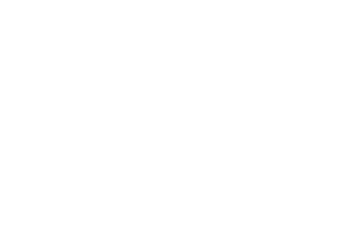

In [16]:
# 提取印刷体文本
import os
import sys
import requests
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO

# Add your Computer Vision subscription key and endpoint to your environment variables.
subscription_key ="8631583d2bfc4ee886a5551eb79fd07f"
endpoint= "https://api-study-image.cognitiveservices.azure.com/"
ocr_url = endpoint + "vision/v2.1/ocr"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://ss1.bdstatic.com/70cFvXSh_Q1YnxGkpoWK1HF6hhy/it/u=2027665713,3948799628&fm=26&gp=0.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'language': 'unk', 'detectOrientation': 'true'}
data = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

# Extract the word bounding boxes and text.
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
print(word_infos)

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(5, 5))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch = Rectangle(origin, bbox[2], bbox[3],
                      fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
plt.show()
plt.axis("off")

# 3. Python使用域模型

### （1）地标

{'result': {'landmarks': [{'name': 'Arc de Triomphe', 'confidence': 0.9995524287223816}]}, 'requestId': '3e32c597-a2fd-4d86-b4bb-561a86032ceb', 'metadata': {'width': 500, 'height': 319, 'format': 'Jpeg'}}


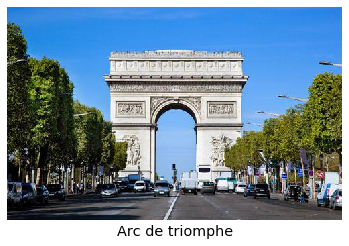

In [18]:
import os
import sys
import requests
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

subscription_key = "8631583d2bfc4ee886a5551eb79fd07f"

endpoint = "https://api-study-image.cognitiveservices.azure.com/"

landmark_analyze_url = endpoint + "vision/v2.1/models/landmarks/analyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://ss3.bdstatic.com/70cFv8Sh_Q1YnxGkpoWK1HF6hhy/it/u=3908512991,2795173694&fm=26&gp=0.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'model': 'landmarks'}
data = {'url': image_url}
response = requests.post(
    landmark_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The
# most relevant landmark for the image is obtained from the 'result' property.
analysis = response.json()
assert analysis["result"]["landmarks"] is not []
print(analysis)
landmark_name = analysis["result"]["landmarks"][0]["name"].capitalize()

# Display the image and overlay it with the landmark name.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(landmark_name, size="x-large", y=-0.1)

### (2)识别明星

{'result': {'celebrities': [{'faceRectangle': {'top': 164, 'left': 263, 'width': 150, 'height': 150}, 'name': 'Karlie Kloss', 'confidence': 0.9999567270278931}]}, 'requestId': 'af182a9d-cb08-46fc-8b27-d82c3c20adeb', 'metadata': {'width': 700, 'height': 1244, 'format': 'Jpeg'}}


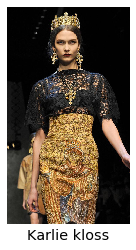

In [20]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "8631583d2bfc4ee886a5551eb79fd07f"
assert subscription_key

vision_base_url = "https://api-study-image.cognitiveservices.azure.com/vision/v2.1/"

celebrity_analyze_url = vision_base_url + "models/celebrities/analyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586948140225&di=86364ddb7f49584daf742522fcf70500&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F31%2F20180731074937_ugikc.thumb.700_0.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'model': 'celebrities'}
data = {'url': image_url}
response = requests.post(
    celebrity_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The
# most relevant celebrity for the image is obtained from the 'result' property.
analysis = response.json()
assert analysis["result"]["celebrities"] is not []
print(analysis)
celebrity_name = analysis["result"]["celebrities"][0]["name"].capitalize()

# Display the image and overlay it with the celebrity name.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(celebrity_name, size="x-large", y=-0.1)

# 3. 高德地图API

In [ ]:
import pandas as pd
import requests

In [79]:
# 获取地理编码
url = "https://restapi.amap.com/v3/geocode/geo?parameters"
params = {
    "key":"04a0f2c511ae63fee5e2b5da9e60417e",
    "address":"中山大学",
    "city":"广州市",
    "batch":True,
    "output":"json",
    "sig":None
}
response = requests.get(url,params=params)
中山大学 = response.json()
中山大学

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省广州市海珠区中山大学',
   'country': '中国',
   'province': '广东省',
   'citycode': '020',
   'city': '广州市',
   'district': '海珠区',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '440105',
   'street': [],
   'number': [],
   'location': '113.291103,23.092973',
   'level': '兴趣点'}]}

In [80]:
# 转换为表格
from pandas.io.json import json_normalize
df = json_normalize(中山大学['geocodes'])
df

,adcode,building.name,building.type,city,citycode,country,district,formatted_address,level,location,neighborhood.name,neighborhood.type,number,province,street,township
0,440105,[],[],广州市,020,中国,海珠区,广东省广州市海珠区中山大学,兴趣点,"113.291103,23.092973",[],[],[],广东省,[],[]


In [122]:
url = "https://restapi.amap.com/v3/geocode/geo?parameters"
params = {
    "key":"04a0f2c511ae63fee5e2b5da9e60417e",
    "address":"珠江新城",
    "city":"广州市",
    "batch":True,
    "output":"json",
    "sig":None
}
response = requests.get(url,params=params)
珠江新城 = response.json()
珠江新城

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省广州市天河区珠江新城',
   'country': '中国',
   'province': '广东省',
   'citycode': '020',
   'city': '广州市',
   'district': '天河区',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '440106',
   'street': [],
   'number': [],
   'location': '113.327343,23.119274',
   'level': '兴趣点'}]}

In [123]:
# 转换为表格
from pandas.io.json import json_normalize
df_2 = json_normalize(珠江新城['geocodes'])
df_2

,adcode,building.name,building.type,city,citycode,country,district,formatted_address,level,location,neighborhood.name,neighborhood.type,number,province,street,township
0,440106,[],[],广州市,020,中国,天河区,广东省广州市天河区珠江新城,兴趣点,"113.327343,23.119274",[],[],[],广东省,[],[]


In [108]:
url = "https://restapi.amap.com/v3/geocode/geo?parameters"
params = {
    "key":"04a0f2c511ae63fee5e2b5da9e60417e",
    "address":"长隆野生动物园",
    "city":"广州市",
    "batch":True,
    "output":"json",
    "sig":None
}
response = requests.get(url,params=params)
长隆野生动物园 = response.json()
长隆野生动物园

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省广州市番禺区野生动物园',
   'country': '中国',
   'province': '广东省',
   'citycode': '020',
   'city': '广州市',
   'district': '番禺区',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '440113',
   'street': [],
   'number': [],
   'location': '113.316067,23.007256',
   'level': '兴趣点'}]}

In [110]:
from pandas.io.json import json_normalize
df_3 = json_normalize(长隆野生动物园['geocodes'])
df_3

,adcode,building.name,building.type,city,citycode,country,district,formatted_address,level,location,neighborhood.name,neighborhood.type,number,province,street,township
0,440113,[],[],广州市,020,中国,番禺区,广东省广州市番禺区野生动物园,兴趣点,"113.316067,23.007256",[],[],[],广东省,[],[]


## 步行路径规划

In [65]:
# 准备key，拼接URL
import pandas as pd
import requests
url = "https://restapi.amap.com/v3/direction/walking?parameters"
params = {
    "key":"04a0f2c511ae63fee5e2b5da9e60417e",
    "origin":"113.291103,23.092973",
    "destination":"113.350961,23.131577",
    "output":"json"
}
response = requests.get(url,params=params)
walking = response.json()
walking

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'count': '1',
 'route': {'origin': '113.291103,23.092973',
  'destination': '113.350961,23.131577',
  'paths': [{'distance': '10343',
    'duration': '8274',
    'steps': [{'instruction': '向东步行30米右转',
      'orientation': '东',
      'road': [],
      'distance': '30',
      'duration': '24',
      'polyline': '113.291089,23.092912;113.291389,23.092873',
      'action': '右转',
      'assistant_action': [],
      'walk_type': '0'},
     {'instruction': '沿园西路向南步行31米左转',
      'orientation': '南',
      'road': '园西路',
      'distance': '31',
      'duration': '25',
      'polyline': '113.291389,23.092869;113.291315,23.092591',
      'action': '左转',
      'assistant_action': [],
      'walk_type': '0'},
     {'instruction': '沿新港西路向东步行2408米向左前方行走',
      'orientation': '东',
      'road': '新港西路',
      'distance': '2408',
      'duration': '1926',
      'polyline': '113.291311,23.092587;113.291997,23.092413;113.291997,23.092413;113.292088,23

In [66]:
from pandas.io.json import json_normalize
road = json_normalize(walking['route']['paths'][0]['steps'])
display(road)

,action,assistant_action,distance,duration,instruction,orientation,polyline,road,walk_type
0,右转,[],30,24,向东步行30米右转,东,"113.291089,23.092912;113.291389,23.092873",[],0
1,左转,[],31,25,沿园西路向南步行31米左转,南,"113.291389,23.092869;113.291315,23.092591",园西路,0
2,向左前方行走,[],2408,1926,沿新港西路向东步行2408米向左前方行走,东,"113.291311,23.092587;113.291997,23.092413;113....",新港西路,0
3,向右前方行走,[],159,127,沿新港西路向东步行159米向右前方行走,东,"113.313277,23.095786;113.313511,23.095842;113....",新港西路,0
4,直行,[],112,90,沿广州大道南向东步行112米直行,东,"113.314818,23.095981;113.314939,23.096029;113....",广州大道南,0
5,[],[],211,169,沿新港中路向东步行211米,东,"113.315764,23.095998;113.315885,23.095968;113....",新港中路,0
6,左转,[],523,418,沿新港中路向东步行523米左转,东,"113.317799,23.09612;113.317982,23.09615;113.31...",新港中路,0
7,向左前方行走,[],621,497,沿艺苑路向北步行621米向左前方行走,北,"113.322934,23.096259;113.323103,23.096593;113....",艺苑路,0
8,直行,[],92,74,沿艺苑路向北步行92米直行,北,"113.325017,23.101176;113.325109,23.101285;113....",艺苑路,0
9,右转,[],16,13,沿广州塔路向北步行16米右转,北,"113.325278,23.101962;113.325278,23.102105",广州塔路,0


In [67]:
road['instruction']

0                向东步行30米右转
1            沿园西路向南步行31米左转
2     沿新港西路向东步行2408米向左前方行走
3      沿新港西路向东步行159米向右前方行走
4         沿广州大道南向东步行112米直行
5            沿新港中路向东步行211米
6          沿新港中路向东步行523米左转
7       沿艺苑路向北步行621米向左前方行走
8            沿艺苑路向北步行92米直行
9           沿广州塔路向北步行16米右转
10          沿艺洲路向东步行215米直行
11      沿双塔路向东步行378米向左前方行走
12            沿双塔路步行149米直行
13                 步行21米左转
14           沿双塔路向东步行73米左转
15                 步行18米左转
16            步行329米向左前方行走
17           向北步行21米向左前方行走
18          向北步行127米向左前方行走
19                步行200米右转
20                   步行46米
21                步行540米左转
22                   步行11米
23                 步行25米右转
24                步行106米右转
25         沿临江大道向东步行450米左转
26                 步行20米直行
27          沿海清路向北步行592米右转
28          沿花城大道向东步行73米左转
29                 步行31米右转
30         沿花城大道向东步行109米左转
31         沿甲子路向东北步行368米左转
32      沿马场路向北步行297米向左前方行走
33                 步行14米右转
34             沿金穗路步行24米直行
35          沿马场路向北步行433米右转
36    沿黄埔大道西向东步行505米向左前方行走
3

## 公交路径规划

In [230]:
# 准备参数
import pandas as pd
import requests

url = "https://restapi.amap.com/v3/direction/transit/integrated?parameters"
params = {
    "key":"04a0f2c511ae63fee5e2b5da9e60417e",
    "origin":'113.291103,23.092973',  # 中山大学
    "destination":'113.327343,23.119274',   # 珠江新城
    "output":"json",
    "city":"广州市",
    "strategy":2  #最少换乘模式
}
response = requests.get(url,params=params)
bussing = response.json()
bussing

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '5',
 'route': {'origin': '113.291103,23.092973',
  'destination': '113.327343,23.119274',
  'distance': '6043',
  'taxi_cost': '19.2118',
  'transits': [{'cost': '2.0',
    'duration': '2515',
    'nightflag': '0',
    'walking_distance': '1366',
    'distance': '7578',
    'missed': '1',
    'segments': [{'taxi': [],
      'walking': {'origin': '113.291092,23.092913',
       'destination': '113.289955,23.092722',
       'distance': '147',
       'duration': '126',
       'steps': [{'instruction': '步行66米左转',
         'road': [],
         'distance': '66',
         'duration': [],
         'polyline': '113.291092,23.092913;113.290451,23.093008',
         'action': '左转',
         'assistant_action': []},
        {'instruction': '步行40米右转',
         'road': [],
         'distance': '40',
         'duration': [],
         'polyline': '113.290443,23.093008;113.290413,23.092899;113.290390,23.092764;113.290344,23.092657',
        

In [231]:
# 公交车
中山大学_珠江新城 = json_normalize(bussing["route"]["transits"][0]["segments"][0]["bus"]["buslines"][0]["via_stops"])
display(中山大学_珠江新城)

,id,location,name
0,440100016304024,"113.294312,23.091654",省荣军医院
1,440100016304007,"113.300803,23.091865",中山大学
2,440100016304008,"113.305687,23.094965",康乐村
3,440100016304009,"113.313004,23.095533",鹭江
4,440100016304010,"113.315460,23.098248",客村立交
5,440100016304011,"113.315399,23.118279",五羊新村
6,440100016304012,"113.315308,23.123398",南方报社


In [232]:
中山大学_珠江新城["name"]

0    省荣军医院
1     中山大学
2      康乐村
3       鹭江
4     客村立交
5     五羊新村
6     南方报社
Name: name, dtype: object

In [246]:
# 地铁
import pandas as pd
from pandas.io.json import json_normalize

a=bussing["route"]["transits"][2]["segments"]

b=[]
for i in a[:2]:
    b.append(i['bus']['buslines'][0])
中山大学_珠江新城 = json_normalize(b)
中山大学_珠江新城[['name','type','via_stops','arrival_stop.name']]

,name,type,via_stops,arrival_stop.name
0,地铁8号线(文化公园--万胜围),地铁线路,"[{'name': '鹭江', 'id': '440100023047008', 'loca...",客村
1,地铁3号线(番禺广场--天河客运站),地铁线路,"[{'name': '广州塔', 'id': '440100023033010', 'loc...",珠江新城


## 驾车路径规划

In [178]:
import pandas as pd
import requests

url = "https://restapi.amap.com/v3/direction/driving?parameters"
params = {
    "key":"04a0f2c511ae63fee5e2b5da9e60417e",
    "origin":'113.291103,23.092973',  # 中山大学
    "destination":'113.316067,23.007256',   # 长隆
    "output":"json",
    "extensions":"base",
    "strategy":2
}
response = requests.get(url,params=params)
car = response.json()
car


{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'route': {'origin': '113.291103,23.092973',
  'destination': '113.316067,23.007256',
  'paths': [{'distance': '12692',
    'duration': '2252',
    'strategy': '距离最短',
    'tolls': '0',
    'toll_distance': '0',
    'steps': [{'instruction': '向西行驶66米左转',
      'orientation': '西',
      'distance': '66',
      'tolls': '0',
      'toll_distance': '0',
      'toll_road': [],
      'duration': '22',
      'polyline': '113.291092,23.092911;113.291016,23.09292;113.290451,23.093008',
      'action': '左转',
      'assistant_action': []},
     {'instruction': '向南行驶28米右转',
      'orientation': '南',
      'distance': '28',
      'tolls': '0',
      'toll_distance': '0',
      'toll_road': [],
      'duration': '4',
      'polyline': '113.290451,23.093008;113.290405,23.092896;113.290382,23.09276',
      'action': '右转',
      'assistant_action': []},
     {'instruction': '沿新港西路向西行驶648米左转进入辅路',
      'orientation': '西',
      'road'

In [180]:
中山大学_长隆= json_normalize(car["route"]["paths"][0]["steps"])
display(中山大学_长隆)

,action,assistant_action,distance,duration,instruction,orientation,polyline,road,toll_distance,toll_road,tolls
0,左转,[],66,22,向西行驶66米左转,西,"113.291092,23.092911;113.291016,23.09292;113.2...",NaN,0,[],0
1,右转,[],28,4,向南行驶28米右转,南,"113.290451,23.093008;113.290405,23.092896;113....",NaN,0,[],0
2,左转,进入辅路,648,128,沿新港西路向西行驶648米左转进入辅路,西,"113.290382,23.09276;113.289314,23.092941;113.2...",新港西路,0,[],0
3,靠左,[],78,5,沿东晓南路辅路向南行驶78米靠左,南,"113.283928,23.093597;113.283997,23.093382;113....",东晓南路辅路,0,[],0
4,直行,进入中间岔道,3012,610,沿东晓南路辅路途径东晓南路向东南行驶3.0千米直行进入中间岔道,东南,"113.284134,23.092911;113.284279,23.092842;113....",东晓南路辅路,0,[],0
5,靠左,沿主路行驶,918,74,沿东晓南路入口途径东晓南路、东晓南路出口、南洲路向东南行驶918米靠左沿主路行驶,东南,"113.296303,23.068808;113.296349,23.068771;113....",东晓南路入口,0,[],0
6,向右前方行驶,进入匝道,370,135,沿南洲路向东行驶370米向右前方行驶进入匝道,东,"113.302238,23.064276;113.303131,23.064226;113....",南洲路,0,[],0
7,靠左,[],319,77,沿三滘立交桥向南行驶319米靠左,南,"113.30584,23.063953;113.306282,23.063837;113.3...",三滘立交桥,0,[],0
8,靠左,沿主路行驶,3467,418,沿三滘立交桥途径广州大道南、洛溪大桥、洛浦路向南行驶3.5千米靠左沿主路行驶,南,"113.305733,23.061768;113.305717,23.061707;113....",三滘立交桥,0,[],0
9,靠左,沿主路行驶,105,1,沿洛浦路向南行驶105米靠左沿主路行驶,南,"113.31179,23.036535;113.311859,23.036354;113.3...",洛浦路,0,[],0


In [182]:
中山大学_长隆["instruction"]

0                                    向西行驶66米左转
1                                    向南行驶28米右转
2                          沿新港西路向西行驶648米左转进入辅路
3                             沿东晓南路辅路向南行驶78米靠左
4              沿东晓南路辅路途径东晓南路向东南行驶3.0千米直行进入中间岔道
5     沿东晓南路入口途径东晓南路、东晓南路出口、南洲路向东南行驶918米靠左沿主路行驶
6                       沿南洲路向东行驶370米向右前方行驶进入匝道
7                             沿三滘立交桥向南行驶319米靠左
8       沿三滘立交桥途径广州大道南、洛溪大桥、洛浦路向南行驶3.5千米靠左沿主路行驶
9                          沿洛浦路向南行驶105米靠左沿主路行驶
10                   沿洛浦路途径大石大桥、富石路向南行驶2.8千米左转
11                            沿香江大道向东南行驶428米靠左
12                              向东行驶222米向右前方行驶
13                              向东南行驶19米向左前方行驶
14                                   向东行驶42米左转
15                                   向北行驶67米右转
16                                   向东行驶39米右转
17                                向南行驶97米到达目的地
Name: instruction, dtype: object

## 行政区域查询

In [183]:
url = "https://restapi.amap.com/v3/config/district?parameters"
params = {
    "key":"04a0f2c511ae63fee5e2b5da9e60417e",
    "keywords":"广东",
    "output":"json",
    "subdistrict":1   # 返回下一级行政区
    
}
response = requests.get(url,params=params)
city = response.json()
city

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'suggestion': {'keywords': [], 'cities': []},
 'districts': [{'citycode': [],
   'adcode': '440000',
   'name': '广东省',
   'center': '113.280637,23.125178',
   'level': 'province',
   'districts': [{'citycode': '0758',
     'adcode': '441200',
     'name': '肇庆市',
     'center': '112.472529,23.051546',
     'level': 'city',
     'districts': []},
    {'citycode': '0757',
     'adcode': '440600',
     'name': '佛山市',
     'center': '113.122717,23.028762',
     'level': 'city',
     'districts': []},
    {'citycode': '0754',
     'adcode': '440500',
     'name': '汕头市',
     'center': '116.708463,23.37102',
     'level': 'city',
     'districts': []},
    {'citycode': '0752',
     'adcode': '441300',
     'name': '惠州市',
     'center': '114.412599,23.079404',
     'level': 'city',
     'districts': []},
    {'citycode': '0755',
     'adcode': '440300',
     'name': '深圳市',
     'center': '114.085947,22.547',
     'level': 'ci

In [184]:
行政区 = json_normalize(city["districts"][0]["districts"])
display(行政区)

,adcode,center,citycode,districts,level,name
0,441200,"112.472529,23.051546",0758,[],city,肇庆市
1,440600,"113.122717,23.028762",0757,[],city,佛山市
2,440500,"116.708463,23.37102",0754,[],city,汕头市
3,441300,"114.412599,23.079404",0752,[],city,惠州市
4,440300,"114.085947,22.547",0755,[],city,深圳市
5,440400,"113.553986,22.224979",0756,[],city,珠海市
6,440800,"110.364977,21.274898",0759,[],city,湛江市
7,441700,"111.975107,21.859222",0662,[],city,阳江市
8,441500,"115.364238,22.774485",0660,[],city,汕尾市
9,445100,"116.632301,23.661701",0768,[],city,潮州市


In [185]:
行政区["name"]

0      肇庆市
1      佛山市
2      汕头市
3      惠州市
4      深圳市
5      珠海市
6      湛江市
7      阳江市
8      汕尾市
9      潮州市
10     江门市
11     云浮市
12    东沙群岛
13     茂名市
14     河源市
15     梅州市
16     东莞市
17     揭阳市
18     清远市
19     韶关市
20     广州市
21     中山市
Name: name, dtype: object

## 搜索POI

### (1) 关键字搜索

In [189]:
url = "https://restapi.amap.com/v3/place/text?parameters"
params = {
    "key":"04a0f2c511ae63fee5e2b5da9e60417e",
    "keywords":"美食",
    "output":"json",
    "city":"杭州"
    
}
response = requests.get(url,params=params)
杭州 = response.json()
杭州

{'status': '1',
 'count': '899',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B023B06AC2',
   'parent': [],
   'childtype': [],
   'name': '肯德基(杭州红石店)',
   'type': '餐饮服务;快餐厅;肯德基',
   'typecode': '050301',
   'biz_type': 'diner',
   'address': '湖墅南路216-218号',
   'location': '120.153147,30.283080',
   'tel': '0571-88370120;4008823823',
   'distance': [],
   'biz_ext': {'rating': '4.5', 'cost': '37.00', 'meal_ordering': '0'},
   'pname': '浙江省',
   'cityname': '杭州市',
   'adname': '拱墅区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': [{'url': 'http://store.is.autonavi.com/showpic/21d4314d78113d1266369f0879c9e255',
     'provider': [],
     'title': []},
    {'url': 'http://store.is.autonavi.com/showpic/56951750c4313efe6a470e00853eae1b',
     'provider': [],
     'title': []},
    {'url': 'http://store.is.autonavi.com/showpic/f7ef17209349619c0e2a068651d43a54',
     'provider': [],
     'title

In [192]:
food = json_normalize(杭州["pois"])
display(food)

,address,adname,biz_ext.cost,biz_ext.meal_ordering,biz_ext.rating,biz_type,childtype,cityname,distance,id,...,name,parent,photos,pname,poiweight,shopid,shopinfo,tel,type,typecode
0,湖墅南路216-218号,拱墅区,37.00,0,4.5,diner,[],杭州市,[],B023B06AC2,...,肯德基(杭州红石店),[],[{'url': 'http://store.is.autonavi.com/showpic...,浙江省,[],[],0,0571-88370120;4008823823,餐饮服务;快餐厅;肯德基,050301
1,上塘路333号海外海皇冠假日酒店2-3层,拱墅区,145.00,0,4.0,diner,202,杭州市,[],B023B09VL6,...,名人名家(海外海店),B023B09M7W,[{'url': 'http://store.is.autonavi.com/showpic...,浙江省,[],[],0,0571-88331117;0571-88331119,餐饮服务;中餐厅;浙江菜,050106
2,河东路130号,下城区,18.00,0,4.0,diner,[],杭州市,[],B023B1FQLT,...,上海老盛昌餐饮有限公司河东店,[],[{'url': 'http://store.is.autonavi.com/showpic...,浙江省,[],[],0,0571-85100850;15306573757;13372524866,餐饮服务;中餐厅;中餐厅,050100
3,湖墅南路413号-2号,拱墅区,89.00,0,4.5,diner,[],杭州市,[],B0FFHFK3L2,...,浅草屋(湖墅南路店),[],[{'url': 'http://store.is.autonavi.com/showpic...,浙江省,[],[],0,0571-85397576,餐饮服务;外国餐厅;日本料理,050202
4,湖墅南路226号红石中央花苑宜家道(近湖墅路),拱墅区,70.00,0,4.0,diner,[],杭州市,[],B023B08T4M,...,豪客来(湖墅南路店),[],[{'url': 'http://store.is.autonavi.com/showpic...,浙江省,[],[],0,0571-88376727,餐饮服务;外国餐厅;西餐厅(综合风味),050201
5,莫干山路491号杭州香园饭店1层,西湖区,25.00,0,4.0,diner,3,杭州市,[],B023B0BFJJ,...,三千尺(莫干山路店),B023B020D8,[{'url': 'http://store.is.autonavi.com/showpic...,浙江省,[],[],0,0571-87757688,餐饮服务;中餐厅;中餐厅,050100
6,河东路138号(近新市街),下城区,30.00,0,4.5,diner,[],杭州市,[],B023B02Q5Y,...,肯德基(杭州朝晖店),[],[{'url': 'http://store.is.autonavi.com/showpic...,浙江省,[],[],0,0571-85238963,餐饮服务;快餐厅;肯德基,050301
7,莫干山路231号,西湖区,141.00,0,4.5,diner,202,杭州市,[],B0FFFEI6X1,...,全聚德烤鸭店(莫干山路店),B023B1DKUA,[{'url': 'http://store.is.autonavi.com/showpic...,浙江省,[],[],0,0571-28925777;4006321321,餐饮服务;中餐厅;北京菜,050111
8,湖墅南路488号运河商厦1层,拱墅区,25.00,0,4.5,diner,202,杭州市,[],B023B08WJQ,...,肯德基(湖墅南路店),B023B0BDCL,[{'url': 'http://store.is.autonavi.com/showpic...,浙江省,[],[],0,0571-88062769;0571-88844639,餐饮服务;快餐厅;肯德基,050301
9,湖墅南路228-230号1-2层,拱墅区,72.00,0,4.0,diner,[],杭州市,[],B023B07XRJ,...,必胜客(拱墅店),[],[{'url': 'http://store.is.autonavi.com/showpic...,浙江省,[],[],0,0571-88376051;0571-88376052,餐饮服务;快餐厅;必胜客,050303


In [196]:
food[["address","adname","name"]]

,address,adname,name
0,湖墅南路216-218号,拱墅区,肯德基(杭州红石店)
1,上塘路333号海外海皇冠假日酒店2-3层,拱墅区,名人名家(海外海店)
2,河东路130号,下城区,上海老盛昌餐饮有限公司河东店
3,湖墅南路413号-2号,拱墅区,浅草屋(湖墅南路店)
4,湖墅南路226号红石中央花苑宜家道(近湖墅路),拱墅区,豪客来(湖墅南路店)
5,莫干山路491号杭州香园饭店1层,西湖区,三千尺(莫干山路店)
6,河东路138号(近新市街),下城区,肯德基(杭州朝晖店)
7,莫干山路231号,西湖区,全聚德烤鸭店(莫干山路店)
8,湖墅南路488号运河商厦1层,拱墅区,肯德基(湖墅南路店)
9,湖墅南路228-230号1-2层,拱墅区,必胜客(拱墅店)


### (2)周边搜索

In [197]:
url = "https://restapi.amap.com/v3/place/around?parameters"
params = {
    "key":"04a0f2c511ae63fee5e2b5da9e60417e",
    "keywords":"美食",
    "location":"113.316067,23.007256",
    "output":"json",
    "city":"广州"
    
}
response = requests.get(url,params=params)
广州 = response.json()
广州

{'status': '1',
 'count': '873',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B00141Y2H6',
   'parent': 'B00141TJLD',
   'childtype': '302',
   'name': '天鹅美食',
   'type': '餐饮服务;中餐厅;中餐厅',
   'typecode': '050100',
   'biz_type': 'diner',
   'address': '大石镇礼村105国道广州长隆野生动物世界',
   'location': '113.315011,23.005777',
   'tel': '020-84788333',
   'distance': '197',
   'biz_ext': {'rating': '3.0', 'cost': [], 'meal_ordering': '0'},
   'pname': '广东省',
   'cityname': '广州市',
   'adname': '番禺区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': [{'url': 'http://store.is.autonavi.com/showpic/a29be5164f2ebf741533030bd308dfb2',
     'provider': [],
     'title': []},
    {'url': 'http://store.is.autonavi.com/showpic/d4faf9222893b8ac3b7533446987cadc',
     'provider': [],
     'title': []},
    {'url': 'http://store.is.autonavi.com/showpic/232d84f3d499ca41eaa81e16464fb800',
     'provider': [],
     'titl

In [198]:
GZ = json_normalize(广州["pois"])
display(GZ)

,address,adname,biz_ext.cost,biz_ext.meal_ordering,biz_ext.rating,biz_type,childtype,cityname,distance,id,...,name,parent,photos,pname,poiweight,shopid,shopinfo,tel,type,typecode
0,大石镇礼村105国道广州长隆野生动物世界,番禺区,[],0,3.0,diner,302,广州市,197,B00141Y2H6,...,天鹅美食,B00141TJLD,[{'url': 'http://store.is.autonavi.com/showpic...,广东省,[],[],0,020-84788333,餐饮服务;中餐厅;中餐厅,050100
1,礼村南路21号附近,番禺区,[],0,[],diner,[],广州市,335,B0FFLLITBU,...,中国兰州拉面,[],[],广东省,[],[],0,[],餐饮服务;快餐厅;快餐厅,050300
2,礼村中路17号附近,番禺区,[],0,3.2,diner,[],广州市,342,B0FFH5FIBL,...,真功夫麻辣烫(礼村中路),[],[],广东省,[],[],0,[],餐饮服务;中餐厅;特色/地方风味餐厅,050118
3,礼村中路38号附近,番禺区,[],0,[],diner,[],广州市,362,B0FFM9ZWWW,...,原味汤粉王,[],[],广东省,[],[],0,[],餐饮服务;快餐厅;快餐厅,050300
4,中路17,番禺区,[],0,[],diner,[],广州市,366,B0FFG1H715,...,沙县小吃,[],[{'url': 'http://store.is.autonavi.com/showpic...,广东省,[],[],0,[],餐饮服务;中餐厅;特色/地方风味餐厅,050118
5,大石镇礼村105国道广州番禺长隆野生动物世界内,番禺区,90.00,0,3.5,diner,302,广州市,368,B00141S6T3,...,青龙餐厅(香江大道),B00141TJLD,[{'url': 'http://store.is.autonavi.com/showpic...,广东省,[],[],0,020-84788333,餐饮服务;中餐厅;中餐厅,050100
6,大石镇礼村中路38号,番禺区,[],0,[],diner,[],广州市,371,B0FFKTR490,...,好滋味,[],[{'url': 'http://store.is.autonavi.com/showpic...,广东省,[],[],0,13431072169,餐饮服务;快餐厅;快餐厅,050300
7,大石街礼村中路15号之二,番禺区,[],0,3.5,diner,[],广州市,379,B0FFGLA4TF,...,正宗龙记面食店(礼村店),[],[{'url': 'http://store.is.autonavi.com/showpic...,广东省,[],[],0,13425911666,餐饮服务;中餐厅;中餐厅,050100
8,大石礼村中路主人花园东北150米,番禺区,[],0,3.3,diner,[],广州市,383,B0FFI0YMJI,...,百味快餐,[],[{'url': 'http://store.is.autonavi.com/showpic...,广东省,[],[],0,18672801469,餐饮服务;快餐厅;快餐厅,050300
9,大石镇礼村路段G105旁593号广州番禺长隆野生动物世界内,番禺区,[],0,[],diner,302,广州市,385,B0FFFTAOOM,...,鱿鱼先生,B00141TJLD,[{'url': 'http://store.is.autonavi.com/showpic...,广东省,[],[],0,020-84783333,餐饮服务;中餐厅;特色/地方风味餐厅,050118


In [199]:
GZ[["address","adname","name"]]

,address,adname,name
0,大石镇礼村105国道广州长隆野生动物世界,番禺区,天鹅美食
1,礼村南路21号附近,番禺区,中国兰州拉面
2,礼村中路17号附近,番禺区,真功夫麻辣烫(礼村中路)
3,礼村中路38号附近,番禺区,原味汤粉王
4,中路17,番禺区,沙县小吃
5,大石镇礼村105国道广州番禺长隆野生动物世界内,番禺区,青龙餐厅(香江大道)
6,大石镇礼村中路38号,番禺区,好滋味
7,大石街礼村中路15号之二,番禺区,正宗龙记面食店(礼村店)
8,大石礼村中路主人花园东北150米,番禺区,百味快餐
9,大石镇礼村路段G105旁593号广州番禺长隆野生动物世界内,番禺区,鱿鱼先生
